# Side Experiments file
* File for doing small experiments for this project, so as to not pollute the main classifier pipeline

In [8]:

const_info_log_enabled = True
def infoLog(logMessage):
    if const_info_log_enabled == True:
        print("")
        print(logMessage)

const_debug_log_enabled = True
def debugLog(logMessage):
    if const_debug_log_enabled == True:
        print("")
        print(logMessage)
        
const_warning_log_enabled = True
def warningLog(logMessage):
    if const_warning_log_enabled == True:
        print("")
        print(logMessage)
        
const_error_log_enabled = True
def errorLog(logMessage):
    if const_error_log_enabled == True:
        print("")
        print(logMessage)

In [9]:
# Used From - http://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console

import sys

def progressIndicator(count, total, suffix=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', suffix))
    sys.stdout.flush()  

In [10]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# JL - explore the data keys
infoLog("Training Data Keys : " + str(train.keys()))
infoLog("Validation Data Keys : " + str(valid.keys()))
infoLog("Test Data Keys : " + str(test.keys()))

# JL - explore data shape
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_valid_shape = X_valid.shape
y_valid_shape = y_valid.shape
X_test_shape = X_test.shape
y_test_shape = y_test.shape

infoLog("Shape of X_train : " + str(X_train_shape))
infoLog("Shape of y_train : " + str(y_train_shape))
infoLog("Shape of X_valid : " + str(X_valid_shape))
infoLog("Shape of y_valid : " + str(y_valid_shape))
infoLog("Shape of X_test : " + str(X_test_shape))
infoLog("Shape of y_test : " + str(y_test_shape))

# JL - explore unique data labels
combined_labels_array = np.concatenate((y_train,y_valid,y_test))
num_of_unique_labels_in_all_data = len(np.unique(combined_labels_array))
infoLog("Total Number of Unique Labels: " + str(num_of_unique_labels_in_all_data))


# JL - explore shape of one image
X_train_zero_shape = X_train[0].shape
infoLog("Shape of X_train[0] : " + str(X_train_zero_shape))

import os
os.system("printf '\a'") # or '\7'



Training Data Keys : dict_keys(['coords', 'features', 'labels', 'sizes'])

Validation Data Keys : dict_keys(['coords', 'features', 'labels', 'sizes'])

Test Data Keys : dict_keys(['coords', 'sizes', 'labels', 'features'])

Shape of X_train : (34799, 32, 32, 3)

Shape of y_train : (34799,)

Shape of X_valid : (4410, 32, 32, 3)

Shape of y_valid : (4410,)

Shape of X_test : (12630, 32, 32, 3)

Shape of y_test : (12630,)

Total Number of Unique Labels: 43

Shape of X_train[0] : (32, 32, 3)


0

In [11]:
# JL - Convenience Mapper

classIdSignNameDict = {0:"Speed limit (20km/h)",
1:"Speed limit (30km/h)",
2:"Speed limit (50km/h)",
3:"Speed limit (60km/h)",
4:"Speed limit (70km/h)",
5:"Speed limit (80km/h)",
6:"End of speed limit (80km/h)",
7:"Speed limit (100km/h)",
8:"Speed limit (120km/h)",
9:"No passing",
10:"No passing for vehicles over 3.5 metric tons",
11:"Right-of-way at the next intersection",
12:"Priority road",
13:"Yield",
14:"Stop",
15:"No vehicles",
16:"Vehicles over 3.5 metric tons prohibited",
17:"No entry",
18:"General caution",
19:"Dangerous curve to the left",
20:"Dangerous curve to the right",
21:"Double curve",
22:"Bumpy road",
23:"Slippery road",
24:"Road narrows on the right",
25:"Road work",
26:"Traffic signals",
27:"Pedestrians",
28:"Children crossing",
29:"Bicycles crossing",
30:"Beware of ice/snow",
31:"Wild animals crossing",
32:"End of all speed and passing limits",
33:"Turn right ahead",
34:"Turn left ahead",
35:"Ahead only",
36:"Go straight or right",
37:"Go straight or left",
38:"Keep right",
39:"Keep left",
40:"Roundabout mandatory",
41:"End of no passing",
42:"End of no passing by vehicles over 3.5 metric tons"}

def getSignNameForClassId(classId):
    return classIdSignNameDict[classId]

infoLog(getSignNameForClassId(0))


Speed limit (20km/h)



Speed limit (60km/h)

Road work


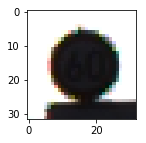

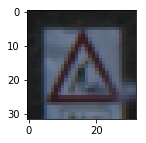

In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for counter in range(0,2):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))
    

In [13]:
# Sample to make a sound for alerting 

import os
os.system("printf '\a'") # or '\7'

0

In [14]:
# Sample to write Data as JSON to Disk and read it back

import time
import json

const_data_analysis_folder = 'data_for_analysis'

def saveDataToDiskAsJson(data):
    if not os.path.exists(const_data_analysis_folder):
        os.makedirs(const_data_analysis_folder)
    currentTime = time.time()
    filename = const_data_analysis_folder + '/' + str(currentTime)
    print(filename)
    with open(filename, 'w') as outfile:
        json.dump(data, outfile)
        
def getDataFromDisk(filename):
    filename = const_data_analysis_folder + '/' + filename
    with open(filename) as infile:
        data = json.load(infile)

In [ ]:
# Testing of saveDataToDiskAsJson

testDict = {"Hello":"World"}
saveDataToDiskAsJson(testDict)

In [ ]:
# Testing of saveDataToDiskAsJson

performanceSummaryDict={'param_epochs': 3}

saveDataToDiskAsJson(performanceSummaryDict)

In [ ]:
    performanceSummaryDict = {"param_epochs" : 3,
    "param_batchsize" : 3,
    "param_mean" : 3,
    "param_standard_deviation" : 3,
    "param_learning_rate" : 3,
    "param_activation_function" : 3,
    "param_architecture_updates" : 3,
    "overall_execution_time" : 3,
    "average_training_and_validation_time" : 3/3,
    "validation_accuracy_trend" : 3,
    "final_validation_accuracy" : 3 }
    
    # Prepare Performance Data to Disk
    saveDataToDiskAsJson(performanceSummaryDict)

In [ ]:

# Sample to load an image and rotate it arbitrarily

import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load a random image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image)
infoLog(getSignNameForClassId(y_train[index]))

# Rotate it arbitrarily
from scipy.ndimage import rotate

def rotateImage(image):
    randomRotationAngle = random.randint(0, 360)
    rotated_image = rotate(image, randomRotationAngle, reshape=False)
    return rotated_image

rotated_image = rotateImage(X_train[index])
plt.figure(figsize=(2,2))
plt.imshow(rotated_image)


In [7]:
# Generate and visualize statistics regarding distribution of Class Labels and Instances for training data

import numpy as np
import matplotlib.pyplot as plt

def generate_class_distribution(classArray):
    classIds, countsForClassIds = np.unique(classArray, return_counts=True)
    labels_count_dictionary = dict(zip(classIds, countsForClassIds))
    mean_number_of_samples_per_class_list_training_data = int(np.mean(countsForClassIds))
    standard_deviation_number_of_samples_per_class_list_training_data = np.std(countsForClassIds)
    max_number_of_samples_per_class_list_training_data = int(np.max(countsForClassIds))
    total_number_of_label_samples = np.sum(countsForClassIds)
    class_samples_percentage_distribution_dict = dict()
    
    for key, value in labels_count_dictionary.items():
        percentage = (float(value)*100.0) / total_number_of_label_samples
        class_samples_percentage_distribution_dict[key] = percentage
    
    infoLog("Label Count Dictionary : " + str(labels_count_dictionary))
    infoLog("Mean Number of samples per class in training data : " + str(mean_number_of_samples_per_class_list_training_data))
    infoLog("Standard Deviation of Number of samples per class in training data : " + str(standard_deviation_number_of_samples_per_class_list_training_data))
    infoLog("Max Number of samples per class in training data : " + str(max_number_of_samples_per_class_list_training_data))
    infoLog("Total Number of samples for all classes in training data : " + str(total_number_of_label_samples))
    infoLog("Percentage Distribution of class data : " + str(class_samples_percentage_distribution_dict))
    
    return labels_count_dictionary, mean_number_of_samples_per_class_list_training_data,standard_deviation_number_of_samples_per_class_list_training_data,max_number_of_samples_per_class_list_training_data, total_number_of_label_samples, class_samples_percentage_distribution_dict

def visualize_class_distribution(labels_count_dictionary):
    classIdlist_training_data = list(labels_count_dictionary.keys())
    number_of_samples_per_class_list_training_data = list(labels_count_dictionary.values())
    plt.plot(classIdlist_training_data,number_of_samples_per_class_list_training_data)
    plt.ylabel('Percentage of samples in data set: ')
    plt.xlabel('Class ID')
    plt.show()

# Visualize training data
labels_count_dictionary, mean_number_of_samples_per_class_list_training_data, standard_deviation_number_of_samples_per_class_list_training_data, max_number_of_samples_per_class_list_training_data, total_number_of_label_samples, class_samples_percentage_distribution_dict = generate_class_distribution(y_train)
visualize_class_distribution(class_samples_percentage_distribution_dict)

NameError: name 'infoLog' is not defined

In [ ]:
# Visualize validation data
labels_count_dictionary, mean_number_of_samples_per_class_list_training_data, standard_deviation_number_of_samples_per_class_list_training_data, max_number_of_samples_per_class_list_training_data, total_number_of_label_samples, class_samples_percentage_distribution_dict = generate_class_distribution(y_valid)
visualize_class_distribution(class_samples_percentage_distribution_dict)

In [ ]:
# Generate and visualize statistics regarding distribution of Class Labels and Instances for validation data


In [ ]:
# Example calculation of a "Boost Ratio" - A relative comparison of a value from the mean, relative to itself

x = 809
y = 1980
boost_ratio = (( x - y ) / y)
    
print(boost_ratio)

In [ ]:
# Separate into under-represented and over-represented classes by calculating mean

training_data_under_represented_classes_dict = dict()
training_data_over_represented_classes_dict = dict()

for class_id, number_of_samples in labels_count_dictionary.items():
    # Evaluate how big is the difference of the number of features for a class from the mean, relative to itself
    # boost_ratio = number of times number_of_samples has to be 'added' to itself to equal 'max_number_of_samples_per_class_list_training_data'
    # We do not want to reject any data, so we will not reject any features for now
    ratio = (mean_number_of_samples_per_class_list_training_data - number_of_samples) / number_of_samples
    if ratio >= 0:
        boost_ratio = int(ratio)
        training_data_under_represented_classes_dict[class_id] = boost_ratio
    else:
        training_data_over_represented_classes_dict[class_id] =  ratio
        
debugLog("Classes with under representation in training samples : " + str(training_data_under_represented_classes_dict))
debugLog("Classes with over representation in training samples : " + str(training_data_over_represented_classes_dict))

def is_class_underrepresented(classId):
    boost_ratio = training_data_under_represented_classes_dict.get(classId, None)
    if boost_ratio:
        return boost_ratio
    else:
        return False
    
def is_class_overrepresented(classId):
    ratio = training_data_over_represented_classes_dict.get(classId, None)
    if ratio:
        return ratio
    else:
        return False
    
infoLog("Is class with Class ID : 31 under represented : " + str(is_class_underrepresented(31)))
infoLog("Is class with Class ID : 1 over represented : " + str(is_class_overrepresented(1)))

In [ ]:
# Iterate over training feature and label set and do a trivial 'Boost' of under-represented features and 'Reject' of over-represented features

training_data_boosted_labels_list = list()
training_data_boosted_features_list = list()

training_data_deboosted_index_list = list()

new_X_train = list()
new_y_train = list()

number_of_labels = len(y_train)

for index, class_id in enumerate(y_train):
    boost_ratio_underrepresented = is_class_underrepresented(class_id)
    boost_ratio_overrepresented = is_class_overrepresented(class_id)

    if boost_ratio_underrepresented:
        image_for_class = X_train[index]
        
        # Add original image and feature
        new_X_train.append(image_for_class)
        new_y_train.append(class_id)
        
        # Add boosted image and feature
        new_X_train.append(rotateImage(image_for_class))
        new_y_train.append(class_id)
    
    elif boost_ratio_overrepresented and boost_ratio_overrepresented < -0.3:
        randomValue = random.randint(0, 2)
        # Add about 33% of the heavily represented features
        if randomValue == 0:
            new_X_train.append(image_for_class)
            new_y_train.append(class_id)
            
    elif boost_ratio_overrepresented and boost_ratio_overrepresented >= -0.3:
        # Add about 66% of the less heavily represented features
        randomValue = random.randint(0, 2)
        if randomValue == 0 or randomValue == 1:
            new_X_train.append(image_for_class)
            new_y_train.append(class_id)

    progressIndicator(index,number_of_labels)

infoLog(" ")
infoLog("Number of elements in :  new_X_train = " + str(len(new_X_train)))
infoLog("Number of elements in :  new_y_train = " + str(len(new_y_train)))



In [ ]:
# Remove indexes / class Ids to be deboosted

# Add the features and labels from boosted lists to the main training data
X_train = new_X_train
y_train = new_y_train


In [ ]:
labels_count_dictionary, mean_number_of_samples_per_class_list_training_data, standard_deviation_number_of_samples_per_class_list_training_data, max_number_of_samples_per_class_list_training_data, total_number_of_label_samples, class_samples_percentage_distribution_dict = generate_class_distribution(y_valid)

visualize_class_distribution(class_samples_percentage_distribution_dict)

In [ ]:
# JL - Take a random image and normalize it

import numpy as np
import copy

const_for_pixel_normalization = 128.0

# Given an image, creates a copy of the same, and then performs normalization on it and returns it
def normalize_image(image):
    image = image.astype(np.float32)
    return_image = copy.copy(image)
    for index,pixel in np.ndenumerate(return_image):
#         debugLog("Pixel Intensity Before Normalization : " + str(pixel))
        pixel = float((pixel-const_for_pixel_normalization) / const_for_pixel_normalization)
#         debugLog("Pixel Intensity After Normalization : " + str(pixel))
        return_image[index] = pixel
    return return_image

def denormalize_image(image):
    return_image = copy.copy(image)
    for index,pixel in np.ndenumerate(return_image):
#         debugLog("Pixel Intensity Before DeNormalization : " + str(pixel))
        pixel = float(pixel*const_for_pixel_normalization) + float(const_for_pixel_normalization)
#         debugLog("Pixel Intensity After DeNormalization : " + str(pixel))
        return_image[index] = pixel
    return return_image

index = random.randint(0, len(X_train))
random_image = X_train[index]
squeezedImage = random_image.squeeze()
plt.figure(figsize=(3,3))
plt.imshow(squeezedImage)

normalized_image = normalize_image(random_image)
squeezedNormalizedImage = normalized_image.squeeze()
plt.figure(figsize=(3,3))
plt.imshow(squeezedNormalizedImage)

denormalized_image = denormalize_image(normalized_image)
squeezedDeNormalizedImage = denormalized_image.squeeze()
plt.figure(figsize=(3,3))
plt.imshow(squeezedDeNormalizedImage)

debugLog("Sign Name : " + getSignNameForClassId(y_train[index]))

In [ ]:
#JL - Create a copy of the training data, so that we have access to the original

import time

num_training_samples = len(X_train)

print(X_train.dtype)
X_train = X_train.astype(np.float32)
print(X_train.dtype)

range_of_interest = range(0, 10)

debugLog("START -- Preprocessing step - normalization - for all training images - Count : " + str(num_training_samples))
start_preprocessing_normalization_time = time.time()

for index in range_of_interest:
    image = X_train[index]
    normalizedImage = normalize_image(image)
    X_train[index] = normalizedImage
    progressIndicator(index,num_training_samples)

end_preprocessing_normalization_time = time.time() 
timediff_preprocessing_normalization_time = end_preprocessing_normalization_time - start_preprocessing_normalization_time
debugLog("END -- Preprocessing step - normalization - for all training images in : " + str(timediff_preprocessing_normalization_time) + " seconds")


In [ ]:
# Visualize the data after normalization
for index in range_of_interest:
    image = X_train[index]
    squeezedImage = image.squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(squeezedImage)

In [ ]:
# Sample to write Data as Pickle File and read it back

import time
import pickle

data_to_test_pickle = {1,2,3,4,5}

const_pickle_data_analysis_folder = 'pickle_data_for_analysis'

def saveDataToDiskAsPickle(data, param_filename = None):
    if not os.path.exists(const_pickle_data_analysis_folder):
        os.makedirs(const_pickle_data_analysis_folder)

    fileName = param_filename
    
    if not fileName:
        filename = str(time.time())
    
    filename = const_pickle_data_analysis_folder + '/' + param_filename + '.pickle'
    
    with open(filename, 'wb') as handle:
        pickle.dump(data, handle,pickle.HIGHEST_PROTOCOL) 
        
def getDataFromPickleFile(filename):
    returnData = None
    filename = const_pickle_data_analysis_folder + '/' + filename + '.pickle'
    try:
        with open(filename, 'rb') as handle:
            returnData = pickle.load(handle)
        return returnData
    except FileNotFoundError:
        return None
        
saveDataToDiskAsPickle(data_to_test_pickle, 'apple')
print(getDataFromPickleFile("apple2"))

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for counter in range(0,4):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    infoLog(getSignNameForClassId(y_train[index]))

In [5]:
# Good, this stuff works !
import tensorflow as tf

# with tf.Session() as sess:
#     var = tf.Variable(42, name='var')
#     var2 = tf.Variable(42, name='var2')
#     sess.run(tf.global_variables_initializer())
#     tf.train.export_meta_graph('file.meta')

tf.reset_default_graph()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('jltrafficclassifier9274.meta')
    sess.run(tf.initialize_all_variables())
    for var in tf.global_variables():
        print(var.name)
        print(var.eval())

#     var = tf.global_variables()[0]
#     var2 = tf.global_variables()[1]
#     sess.run(tf.initialize_all_variables())
#     print(sess.run(var))
#     print(sess.run(var2))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
wconv1:0
[[[[ 0.0521473  -0.0403907   0.11918306 ..., -0.12034923  0.0273728
     0.10774481]
   [ 0.03211575 -0.0706714  -0.09652757 ...,  0.00759685 -0.0319097
    -0.0798236 ]
   [ 0.16557045 -0.02042091 -0.00802558 ..., -0.02105529  0.03010474
     0.0662534 ]]

  [[ 0.0586953  -0.07126959 -0.15117612 ..., -0.08035263 -0.03418883
     0.04427895]
   [ 0.11813875 -0.02936127 -0.05972567 ...,  0.0054668  -0.04688738
    -0.01035806]
   [-0.06887747 -0.08544715 -0.16264282 ..., -0.1491645  -0.18784316
     0.161155  ]]

  [[ 0.09534549  0.04599084 -0.05108523 ..., -0.02259701  0.11847635
    -0.09725537]
   [-0.04096941 -0.09228892 -0.01191236 ...,  0.00526696 -0.01861077
    -0.05161386]
   [ 0.05662278 -0.02125306  0.06653465 ...,  0.04311119 -0.00581111
     0.12070592]]

  [[-0.16312115 -0.19902585  0.05451896 ...,  0.09134386 -0.07479624
    -0.07676481]
   [ 0.03996577 -0.00312804 -0.03657093 ...,  0.10802

In [3]:
import tensorflow as tf

with tf.Session() as sess:
    
    checkpoints = tf.train.Saver.last_checkpoints('.')
    
    print(checkpoints)

#     saver.restore(sess, tf.train.latest_checkpoint('.'))

TypeError: 'property' object is not callable

In [12]:
import operator
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
print(type(x))
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x)

<class 'dict'>
[(3, 4), (4, 3), (1, 2), (2, 1), (0, 0)]
